# COGS 118B - Final Project

# Utilizing Unsupervised Machine Learning to Optimize Stock Portfolios

## Group members

- Griffin Barros-King
- Alex Vo
- Xinyi Zhang
- Ryan Wong
- Immanuel Chai

# Abstract
Unsupervised machine learning presents a viable approach to optimizing stock portfolios by analyzing risk-return profiles without explicit guidance or predefined labels. The research aims to explore the effectiveness of leveraging unsupervised learning algorithms to categorize stocks based on the risk-return profile of a given stock. Using historical stock market data such as daily prices, volatility, and financial ratios, we can identify the correlations that lead to portfolio optimization. We can apply clustering techniques and dimensionality reduction methods with the goal of grouping stocks into distinct categories that reflect the risk-return profile of a given stock. The performance of this unsupervised machine learning approach will be evaluated by comparing traditional portfolio optimization methods against the output of the model. We also aim to provide general insights into the applicability of unsupervised learning in financial portfolio management. 

# Background 

Stock trading involves the buying and selling of financial instruments such as stocks, bonds, or derivatives with the goal of generating profits. Stock portfolios refer to the collections of financial assets owned by investors, which are carefully constructed based on the investor’s investing preferences. Specific investment objectives include maximizing returns, minimizing risk, or achieving a balance between the two. Unsupervised machine learning techniques, such as clustering or dimensionality reduction, can greatly assist in portfolio construction by grouping assets with similar risk-return profiles or reducing the dimensionality of the feature space whilst preserving the relevant information. This can aid in the creation of diversified, risk-averse, profitable portfolios. The application of unsupervised machine learning methods for optimizing stock portfolios has been gaining considerable attention recently with the emergence and fast-development of artificial intelligence. Unsupervised models have the potential to outperform traditional methods of portfolio management because of the model’s ability to recognize patterns and exploit anomalies. These indicators from the model can be helpful signals for prompting buying or selling action on the investor’s end. Past research has demonstrated that machine learning methods such as the K-Means clustering algorithm helped decrease loan risk categories to minimize businesses’ financial losses.  <a name="ieee"></a>[<sup>[1]</sup>](#ieeenote). The algorithm proved to be highly accurate in predicting loan risk to achieve optimized stock portfolios. Unsupervised machine learning methods can also extract technical analysis indicators, sentiment analysis, or fundamental ratios from a given businesses’ financial statements. <a name="oleh"></a>[<sup>[2]</sup>](#olehnote).
This data can be utilized as inputs for the model to forecast stock prices or estimate future profitability. By leveraging the power of machine learning, investors can gain more detailed insights into financial markets, improve their trading strategies, and ultimately create more profitable portfolios than they would create using traditional methods. 

# Problem Statement 

We are optimizing stock portfolios based on various risk-return investor preferences. The problem at hand is that most people do not know how to efficiently allocate their financial resources to create a portfolio that is both profitable and low risk. Our proposed solution is to use an efficient clustering algorithm such as K-means or the Gaussian Mixture Model to group stocks based on their risk-return profiles. Leveraging the power of machine learning can help us find meaningful insights from the stock data. We will be quantifying our data using metrics such as the Sharpe ratio and the Compound Annual Growth Rate. Our dataset has a sufficient sample size so this experiment can be reproduced and the findings are valid because we are not extrapolating conclusions from a small dataset. Our dataset contains 21 years worth of data. 

# Data 

The dataset we are using is a stock market dataset that contains price and trading volume metrics for every stock and ETF in the NASDAQ exchange for every day from 11/08/1999 to 04/01/2020.
- Link to dataset: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset
- The dataset has 7 variables and 7450 observations(per stock/etf, 5884 stocks, 2165 etfs)
- Each observation consists of the date along with the opening price, closing price, high price, low price, adjusted closing price, and volume traded on that day.
- To look at volatility in each stock we want to look at the differences between the high and low prices of the stock to see how much the stock can change during one trading day. 
- We will also want to look at how the opening and closing prices change. If the stock price increases consistently over a long enough time frame, that is considered a stock with good return. 
- The dataset is already relatively clean. The one thing we may want to do is normalize the prices, so we can look at the volatility and returns in terms of percent change.


# Proposed Solution


In order to address the problem of optimizing stock portfolios using unsupervised machine learning techniques, we propose the following solution:

Data preprocessing: 

- Cleaning dataset: remove unnecessary data and handle missing values to keep data consistent.
- Normalize the prices: Convert the prices into percentage changes to facilitate easy comparison of volatility and returns across different stocks.
- Calculate additional features about stock portfolios. For example: price volatility, average price change. 

Unsupervised Learning:

- Utilize clustering techniques such as K-Means or Gaussian Mixture Models to categorize stocks based on their risk-return profiles.
- Implement dimensionality reduction methods like Principal Component Analysis (PCA) to reduce the feature space while preserving relevant information.

Benchmark Model:

- Compare the performance of our unsupervised learning-based approach with traditional portfolio optimization method

Portfolio Optimization

- Construct portfolios by selecting stocks from each cluster to achieve desired risk-return profiles.
- Evaluate portfolio performance using metrics such as Sharpe ratio, cumulative returns, and portfolio volatility.

Implementation:
- Utilize Python libraries such as pandas, NumPy, and scikit-learn for data preprocessing, feature engineering, and model implementation.
- For clustering and dimensionality reduction, use scikit-learn's implementations of K-Means and PCA.
- Visualize results using matplotlib or seaborn to provide insights into portfolio composition and performance.

Testing:
- Split the dataset into training and testing sets to evaluate model performance.


# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

Total return and Compound Annual Growth Rate (CAGR):

- $CAGR = \left( \frac{{P_f}}{{P_i}} \right)^{\frac{1}{n}} - 1$
where P_i is the initial investment value, P_f is the final investment value, n is the number of years in the investment period.

Sharpe ratio:

- $Sharpe Ratio = \frac{{R_p - R_f}}{{\sigma_p}}$
where R_p is the average return of the portfolio, R-f is the risk-free rate of return, and signma_p is the standard deviation of the portfolio's excess return.

For the benchmark model and the solution model, we can calculate the Sharpe Ratio for each portfolio constructed using their respective optimization methods. We can then compare the Sharpe Ratios to assess which model generates portfolios with superior risk-adjusted returns.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Loading data and getting it into dataframe.

In [2]:
file_paths = ['datasets/AAPL.csv', 'datasets/ADBE.csv', 'datasets/ADI.csv', 'datasets/ADSK.csv', 'datasets/AMAT.csv',
              'datasets/AMD.csv', 'datasets/AMX.csv', 'datasets/APH.csv', 'datasets/ASML.csv', 'datasets/AVGO.csv', 
              'datasets/CDNS.csv', 'datasets/CRM.csv', 'datasets/CSCO.csv', 'datasets/IBM.csv', 'datasets/INFY.csv', 
              'datasets/INTC.csv', 'datasets/INTU.csv', 'datasets/KLAC.csv', 'datasets/LRCX.csv', 'datasets/MSFT.csv', 
              'datasets/MSI.csv', 'datasets/MU.csv', 'datasets/NTES.csv', 'datasets/NVDA.csv', 'datasets/ORCL.csv', 
              'datasets/QCOM.csv', 'datasets/RELX.csv', 'datasets/ROP.csv', 'datasets/SMCI.csv', 'datasets/SNPS.csv', 
              'datasets/T.csv', 'datasets/TMUS.csv', 'datasets/TSM.csv', 'datasets/TXN.csv', 'datasets/VMW.csv', 
              'datasets/VZ.csv']

combined_data = pd.DataFrame()

for file_path in file_paths:
    try:
        data = pd.read_csv(file_path)
        data['Company'] = file_path.split('/')[1].split('.')[0]
        data['Date'] = pd.to_datetime(data['Date'])
        data = data[data['Date'].dt.year.between(2010, 2020)]
        combined_data = pd.concat([combined_data, data], ignore_index=True)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        
combined_data.dropna(inplace=True)
combined_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.538483,123432400.0,AAPL
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.584366,150476200.0,AAPL
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.161509,138040000.0,AAPL
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.113146,119282800.0,AAPL
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.286753,111902700.0,AAPL


Organizing data and extracting important features and information.

In [3]:
#Get list of company names
companies = combined_data.groupby('Company').max().index.tolist()

#create empty list to hold each row before turning it into Data Frame
d = []

#iterates through the company names to create a row with new data for each company
for val in companies:

    #initialize start dates for monthly variance
    company = val
    company_data = combined_data[combined_data['Company'] ==  company]
    start_date = np.datetime64('2010-01-04')
    end_date = np.datetime64('2010-02-04')
    month_num = 1
    company_dict = {'Company': company}


    #get percent increase 
    first_close = combined_data[(combined_data['Date'] == np.datetime64('2010-01-04')) & (combined_data['Company'] == company)]['Close'].to_numpy()[0]
    last_close = combined_data[(combined_data['Date'] == np.datetime64('2020-04-01')) & (combined_data['Company'] == company)]['Close'].to_numpy()[0]
    percent_increase = ((last_close - first_close) / first_close) * 100
    company_dict['Percent Increase'] = percent_increase

    #Go through each start date and get variance. increases one month each iteration.
    while start_date < np.datetime64('2020-04-01'):
        if end_date > np.datetime64('2020-04-01'):
            end_date = np.datetime64('2020-04-01')

        month_data = company_data[(company_data['Date'] >= start_date) & (company_data['Date'] < end_date)]
        month_var = month_data['Close'].var()
        month_name = f'Month {month_num}'
        company_dict[month_name] = month_var

        start_date = pd.Timestamp(start_date) + pd.DateOffset(months = 1)
        start_date = start_date.to_numpy()
        end_date = pd.Timestamp(start_date) + pd.DateOffset(months = 1)
        end_date = end_date.to_numpy()
        month_num += 1
    d.append(company_dict)

company_monthly_vars = pd.DataFrame(d)
company_monthly_vars = company_monthly_vars.set_index('Company')



company_monthly_vars.head()

,Percent Increase,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,...,Month 114,Month 115,Month 116,Month 117,Month 118,Month 119,Month 120,Month 121,Month 122,Month 123
Company,,,,,,,,,,,,,,,,,,,,,
AAPL,687.986561,0.954537,0.519093,0.744693,2.781644,1.304811,2.090250,0.504275,1.080491,2.525038,...,39.791772,10.748029,25.925955,15.131504,69.898074,11.396876,118.952641,51.407995,317.622177,458.376251
ADBE,712.105662,3.228057,1.314512,0.171309,0.632196,1.023923,5.196084,0.872039,0.616386,9.281136,...,140.131840,19.912307,19.964047,24.853079,30.600960,64.212705,137.681831,49.795308,169.770605,415.868791
ADI,165.519407,2.785442,1.429493,0.351846,0.499656,0.503502,0.985733,0.547625,0.594450,1.327067,...,25.777400,13.313453,4.401147,5.735601,5.133485,2.675371,4.488402,13.528846,24.414862,71.062441
ADSK,442.345153,0.911805,4.006281,0.083779,2.343406,2.078902,2.440809,4.515366,0.981124,1.016070,...,16.676761,54.338514,12.069422,14.145386,10.418783,92.014641,9.941297,16.780226,94.237007,192.566404
AMAT,202.797193,0.731463,0.086750,0.197283,0.153785,0.110340,0.234145,0.068026,0.217606,0.141570,...,2.430085,7.460683,0.715062,0.811979,4.587659,4.329586,4.314798,2.665993,10.710307,47.118817


Defining plotting function (CURRENTLY BORROWED FROM A4 WE CAN RE WRITE IT IF NECESSARY)

In [4]:
def plot_components(components,x='pc1',y='pc2'):
    '''
    2d scatter plot of dimensionality reductions with labelling

    inputs:
        components (pd.DataFrame) shape is (samples x components), index is sample names
        x (str) name of column in components to plot as x axis
        y (str) name of column in components to plot as y axis

    typically you might generate components like this
        pcs = PCA(n_components=2).fit_transform(daily_change)
        components = pd.DataFrame(pcs,columns=['pc1','pc2'])
        components.index = daily_change.index
    '''
    sns.scatterplot(data=components, x=x, y=y)
    sns.despine()
    ax = plt.gca()
    for company in components.index:
        ax.annotate(company,xy=components.loc[company])

# Results





### Subsection 1

Performing Principal Component Analysis on companies to reduce dimensionality and then applying K-Means Clustering after fitting K-Means models for different values of k to find point of diminishing return through the elbow point representing the optimal number of clusters for the dataset.

In [5]:
#Performing PCA
pcs = PCA(n_components= 2).fit_transform(company_monthly_vars)

#Applying K-Means Clustering
inertia_values = []

# Range of k values to try
k_values = range(1, 11)

# Fitting KMeans models for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pcs)
    inertia_values.append(kmeans.inertia_)

c:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

Visualization of Elbow Method

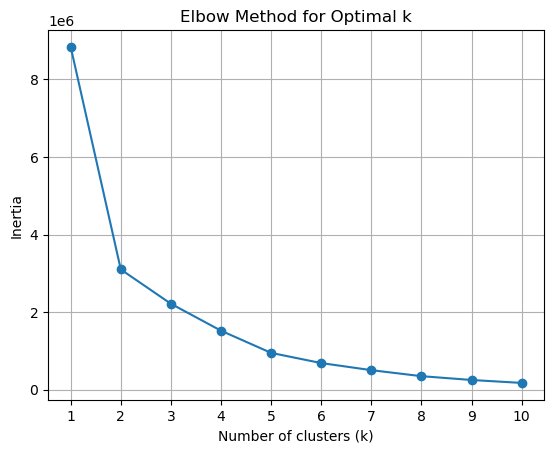

In [6]:
# Plot inertia values
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Created function that finds optimal k value (optimal number of clusters).

In [7]:
#Finding elbow point (optimal k value)
def find_optimal_k(inertia_values):
    # Calculate difference in inertia values
    differences = [inertia_values[i] - inertia_values[i+1] for i in range(len(inertia_values)-1)]
    # Find index of max difference
    optimal_k_index = differences.index(max(differences))
    optimal_k = optimal_k_index + 2
    return optimal_k

optimal_k = find_optimal_k(inertia_values)
print("Optimal number of clusters (k):", optimal_k)
#setting number of clusters to optimal_k
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(pcs)

Optimal number of clusters (k): 2


c:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Public\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

Visualization of PCA

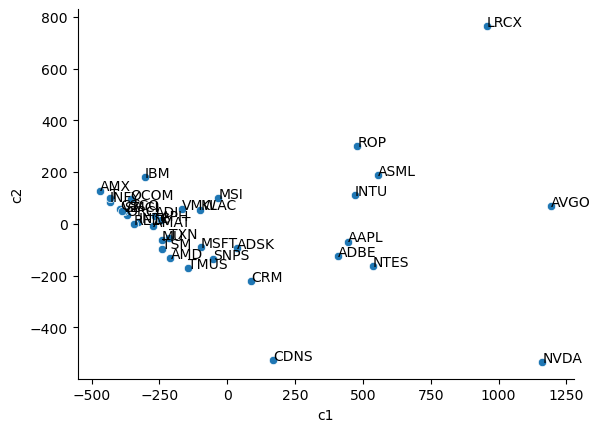

In [8]:
pca = pd.DataFrame(pcs,columns=['c1','c2'])
pca.index = company_monthly_vars.index


plot_components(pca,'c1','c2')

Visualization of K-Means Clustering

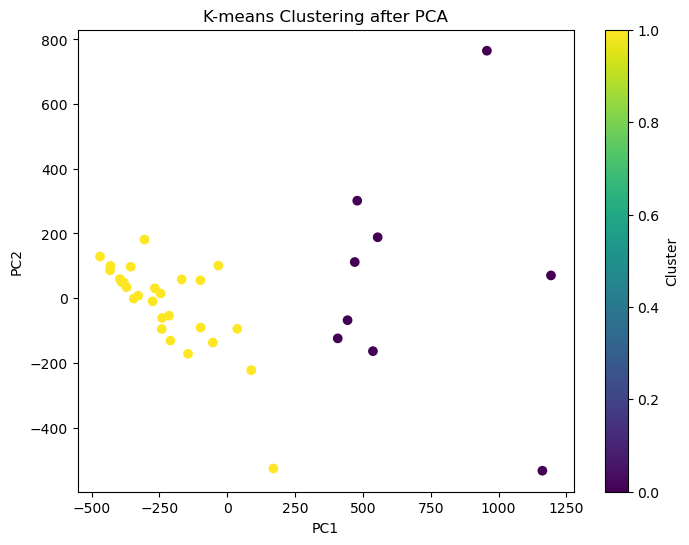

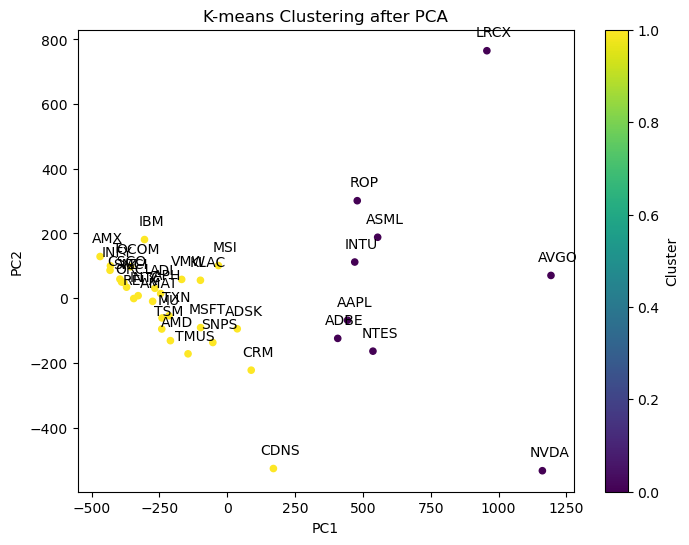

In [9]:
#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(pcs[:, 0], pcs[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering after PCA')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(pcs[:, 0], pcs[:, 1], c=kmeans.labels_, cmap='viridis', s=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering after PCA')

for company in range(len(pcs)):
    plt.annotate(companies[company], (pcs[company, 0], pcs[company, 1]), textcoords="offset points", xytext=(5, 10), ha="center")

plt.colorbar(label='Cluster')
plt.show()



### Subsection 2

Finding CAGR and Sharpe ratios to compare 

In [10]:
# pivoting and preprocessing the data
pivoted_data = combined_data.pivot(index='Date', columns='Company', values='Adj Close')
pivoted_data.index = pd.to_datetime(pivoted_data.index)
pivoted_data.fillna(method='ffill', inplace=True)

# calculating daily returns, annualized return, and standard deviation
daily_returns = pivoted_data.pct_change()
annualized_return = daily_returns.mean() * 252
annualized_std = daily_returns.std() * np.sqrt(252)

# sharpe ratio calculations
risk_free_rate = 0.0
sharpe_ratios = (annualized_return - risk_free_rate) / annualized_std

# sort sharpe ratios in ascending order
sorted_sharpe_ratios = sharpe_ratios.sort_values()

# CAGR Calculation
beginning_value = pivoted_data.iloc[0]
ending_value = pivoted_data.iloc[-1]
n_years = (pivoted_data.index[-1] - pivoted_data.index[0]).days / 365.25
CAGR = (ending_value / beginning_value) ** (1/n_years) - 1

# sort CAGR in ascending order
sorted_CAGR = CAGR.sort_values()

Plotting sharp and CAGR ratios

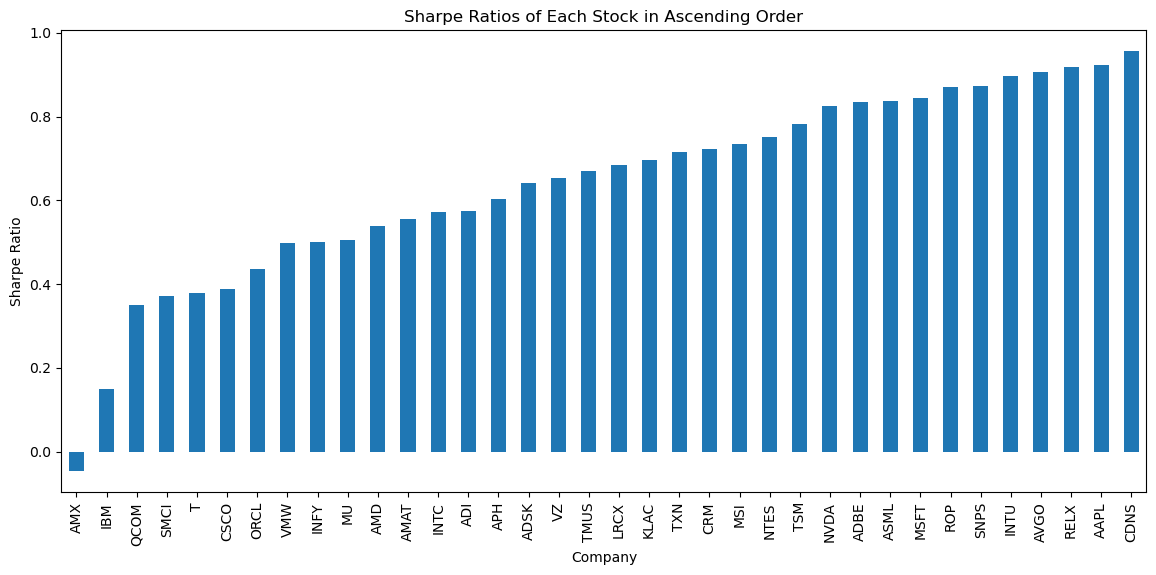

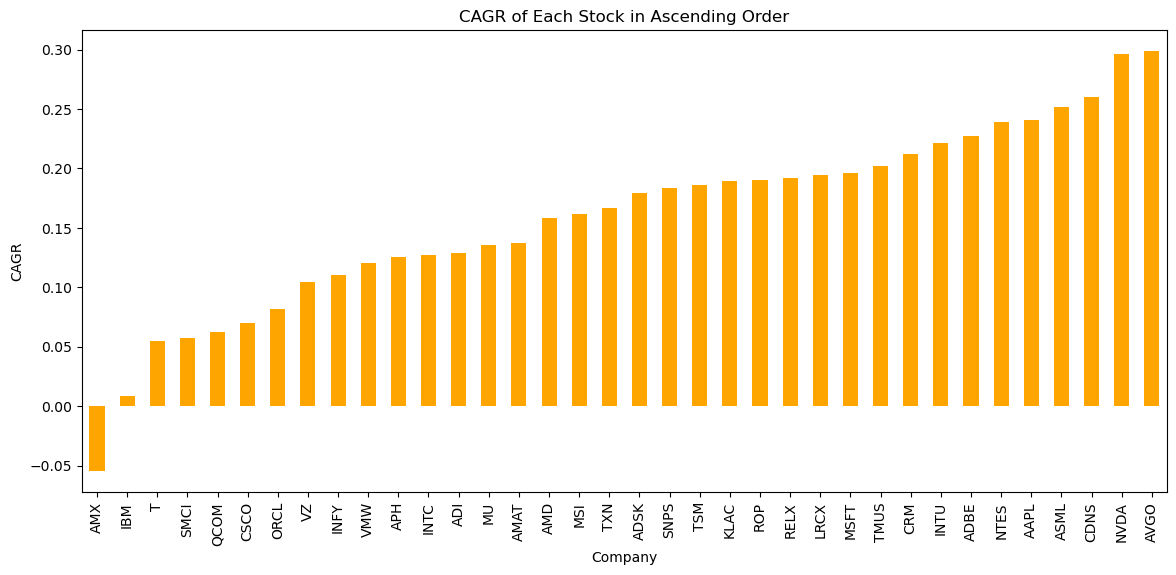

In [11]:
plt.figure(figsize=(14, 6))
sorted_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios of Each Stock in Ascending Order')
plt.ylabel('Sharpe Ratio')
plt.show()

plt.figure(figsize=(14, 6))
sorted_CAGR.plot(kind='bar', color='orange', title='CAGR of Each Stock in Ascending Order')
plt.ylabel('CAGR')
plt.show()

### Subsection 3

Adding Sharpe ratios for train-test split

In [12]:
combined_data_with_sharpe = combined_data
sharpe_ratio_mapping = sharpe_ratios.to_dict()
combined_data_with_sharpe['sharpe_ratios'] = combined_data_with_sharpe['Company'].map(sharpe_ratio_mapping)

Run train test split

In [13]:
target_column = 'sharpe_ratios'  # Update this if the column name is different

if target_column in combined_data_with_sharpe.columns:
    # Select only numeric columns for simplicity (excluding the target column)
    X = combined_data_with_sharpe.select_dtypes(include=[np.number]).drop(target_column, axis=1)
    y = combined_data_with_sharpe[target_column]

    # Split the data into training and testing sets (50/50 split)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(train_X, train_y)

    # Predict on the test set
    predictions = model.predict(test_X)

    # Calculate and print the Mean Squared Error
    mse = mean_squared_error(test_y, predictions)
    print(f"Mean Squared Error: {mse}")
else:
    print(f"Error: Target column '{target_column}' not found in the dataset.")

Mean Squared Error: 0.04399802446926442


### Subsection 4


demonstration of model selection using validation curves and assessing performance variability across folds of cross-validation

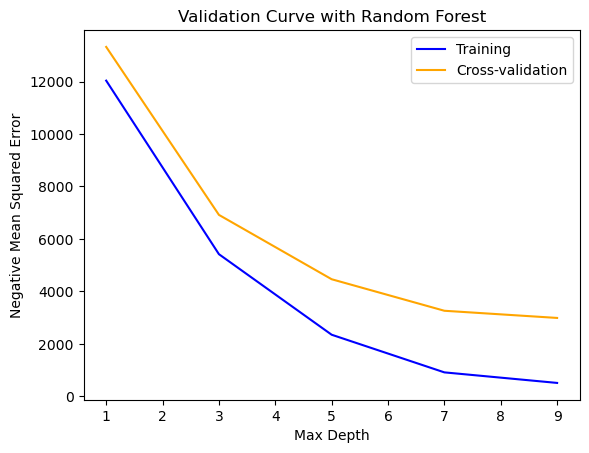

In [14]:
# Generate synthetic dataset
train_X, train_y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Define hyperparameters range
param_range = np.arange(1, 11, 2)

train_scores, valid_scores = validation_curve(
    RandomForestRegressor(), train_X, train_y,
    param_name="max_depth", param_range=param_range,
    scoring="neg_mean_squared_error", cv=3, n_jobs=-1)

plt.plot(param_range, -np.mean(train_scores, axis=1), label="Training", color="blue")
plt.plot(param_range, -np.mean(valid_scores, axis=1), label="Cross-validation", color="orange")
plt.xlabel("Max Depth")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve with Random Forest")
plt.legend()
plt.show()

best_max_depth = param_range[np.argmax(np.mean(valid_scores, axis=1))]

# Train model with selected max_depth
model = RandomForestRegressor(max_depth=best_max_depth)
model.fit(train_X, train_y)

cv_scores = cross_val_score(model, train_X, train_y, scoring="neg_mean_squared_error", cv=3, n_jobs=-1)

Cross-validation MSE: 2988.1404646292463

Standard Deviation of MSE: 240.58400444219748


### Subsection 5

we're using the R-squared (coefficient of determination) metric for both the validation curve and cross-validation. 

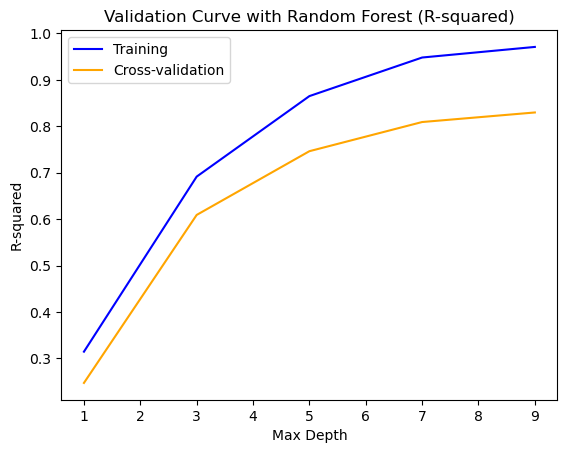

In [15]:
# Generate synthetic dataset
train_X, train_y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Define hyperparameters range
param_range = np.arange(1, 11, 2)

# Perform validation curve
train_scores, valid_scores = validation_curve(
    RandomForestRegressor(), train_X, train_y,
    param_name="max_depth", param_range=param_range,
    scoring="r2", cv=3, n_jobs=-1)

plt.plot(param_range, np.mean(train_scores, axis=1), label="Training", color="blue")
plt.plot(param_range, np.mean(valid_scores, axis=1), label="Cross-validation", color="orange")
plt.xlabel("Max Depth")
plt.ylabel("R-squared")
plt.title("Validation Curve with Random Forest (R-squared)")
plt.legend()
plt.show()

# Select best max_depth based on validation curve
best_max_depth = param_range[np.argmax(np.mean(valid_scores, axis=1))]

# Train model with selected max_depth
model = RandomForestRegressor(max_depth=best_max_depth)
model.fit(train_X, train_y)

# Evaluate model performance using cross-validation
cv_scores = cross_val_score(model, train_X, train_y, scoring="r2", cv=3, n_jobs=-1)

# Discussion

### Interpreting the result


Main point:
- The solution model categorizes stocks based on their risk-return characteristics, enabling the construction of portfolios tailored to investor preferences.
- By clustering stocks with similar risk-return profiles, the model ensures that portfolios strike an optimal balance between risk and return.

Secondary points:
- Portfolio Diversification: Portfolios generated by the solution model exhibit higher Sharpe Ratios compared to the benchmark model, indicating superior risk-adjusted returns. Higher Sharpe ratios suggest that portfolios constructed using the solution model achieve better returns for a given level of risk, thereby enhancing portfolio stability.

- Data Preprocessing Significance: Proper data preprocessing, including cleaning, normalization, and feature engineering, plays a crucial role in enhancing the quality of input data for portfolio optimization. The normalization of prices and calculation of additional features contribute to a more comprehensive understanding of stock behavior, facilitating more informed investment decisions.

- Robustness to Market Dynamics: The solution model demonstrates robustness to market dynamics by adapting to changing conditions and effectively categorizing stocks based on their risk-return characteristics. This adaptability ensures that portfolios remain resilient to market fluctuations and are well-equipped to navigate various economic environments.



### Limitations 

While the data used in the project spans 21 years, supplementing the dataset with more recent data could offer valuable insights into evolving market trends and behaviors.
Exploring a wider range of hyperparameters for clustering algorithms (e.g., K-Means, Gaussian Mixture Models) and dimensionality reduction methods (e.g. Principal Component Analysis) could uncover optimal configurations that improve portfolio optimization outcomes. Conducting a thorough hyperparameter search allows for better model fine-tuning and optimization, potentially leading to superior performance.


### Ethics & Privacy

One of the main ethical issues that we believe is present is a strong bias towards American markets. Since we only have data from the NASDAQ exchange, any beneficial information or model we make may not be effective in foreign markets because foreign markets and American markets are distinct entities. This could lead to an unfair benefit towards people who invest in American markets versus those who do not. This could be mitigated by finding datasets that include information from multiple markets other than the NASDAQ - particularly in foreign markets. We could also just test a few other markets and see if the conclusions we find in the American markets carry over to those ones. If so, we can possibly show that the benefit of the model developed would carry over to other markets. 

Another potential issue is the unfairness of those who have the technology to run whatever model we develop versus those who do not. While the world has seen a great increase in access to technology, there are still great differences in the quality of the technology people can access. The models we run are complex. It is possible that our model would be more beneficial to those who can run similar simulations on better technology. This could create an unfair financial advantage to those who are more likely to already be financially stable.

Another potential issue is if the model is effective enough in both predicting and managing stocks. It could lead to a loss in jobs for those who work in the financial sector. A way to mitigate both this issue and the previously addressed issue would be to restrict the use of our model to research purposes. This would prevent any market advantages from being gained by those who would unfairly benefit from the model.

There are no issues with data privacy for our datasets. This is because all the information we use is publicly available and must be by law. There is also no PII in the dataset. 



### Conclusion


Leveraging unsupervised machine learning techniques for portfolio optimization yields portfolios with superior risk-adjusted returns compared to traditional methods. The higher Sharpe Ratios obtained through the solution model underscore its effectiveness in constructing well-balanced portfolios aligned with investor preferences. This work contributes to the growing body of research in financial portfolio management and highlights the potential of machine learning in addressing complex investment challenges. Future research could focus on incorporating more recent stock market data (post COVID time period) and exploring additional optimization strategies to further enhance portfolio returns.

# Footnotes

<a name="ieeenote"></a>1.[^](#ieee): S. H. Sudjono, F. H. Adrian, C. A. Sunarya, G. F. Ariyanto and N. T. M. Sagala, "Comparison of Different Machine Learning Algorithms for Predicting Loan Risk Categories," 2023 International Conference on Computer Science, Information Technology and Engineering (ICCoSITE), Jakarta, Indonesia, 2023, pp. 773-778, doi: 10.1109/ICCoSITE57641.2023.10127758. keywords: {Machine learning algorithms;Computational modeling;Clustering algorithms;Companies;Predictive models;Boosting;Prediction algorithms;kmeans clustering;boosting algorithm;loan risk;predictive model},

<a name="olehnote"></a>2.[^](#oleh): Oleh Onyshchak. (2020). Stock Market Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/1054465


